In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:

from IPython.display import display, Markdown

import sys
sys.path.append('.')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


from util import (
  draw_graphs as _draw_graphs,
  plot_distance_heatmap,
  plot_max_match_results
)
from pipeline import make_pipeline

from mcopt import ot, MorseGraph

In [3]:
pipeline = make_pipeline()

heated_cylinder = pipeline.dataset('heated_cylinder')

display(Markdown(heated_cylinder.display_description()))


# Heated Cylinder


TODO
 


In [4]:
graphs = pipeline.graph('heated_cylinder').build().frames
nets = pipeline.mm_network('heated_cylinder').build().frames
attributes = pipeline.attributes('heated_cylinder').build()

> [graph:heated_cylinder] config unchanged, loading


> [mmnetwork:heated_cylinder] config unchanged, loading


> [attributes:heated_cylinder] config unchanged, loading


In [5]:
max_match_pfgw = pipeline.max_match('heated_cylinder_max_match_pfgw').build()


> [max_match:heated_cylinder_max_match_pfgw] config unchanged, loading


In [6]:
nets[879].metric.max()

0.890512619140437

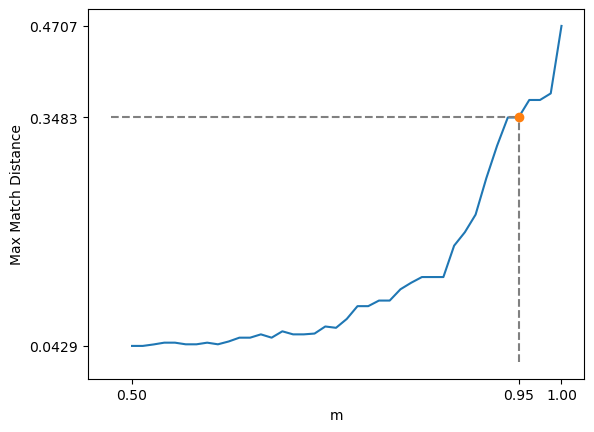

In [7]:
m = 0.95

fig, ax = plt.subplots()
  
x = max_match_pfgw.ms
y = max_match_pfgw.results[:, 4]

ax.plot(x, y)

ymin, _ = ax.get_ybound()
xmin, _ = ax.get_xbound()

i = np.abs(x - m).argmin()

ax.add_line(Line2D([x[i], x[i]], [ymin, y[i]], color='grey', linestyle='--'))
ax.add_line(Line2D([xmin, x[i]], [y[i], y[i]], color='grey', linestyle='--'))
ax.plot(x[i], y[i], marker='o')

ax.set_xlabel('m', fontsize=10)
ax.set_ylabel('Max Match Distance', fontsize=10)

ax.set_xticks([x.min(), x[i], x.max()])
ax.set_yticks([y.min(), y[i], y.max()])

In [8]:
src_net = nets[800]
dest_net = nets[879]

coupling, _ = ot.pfGW(
  src_net, 
  dest_net, 
  m = m,
  M = attributes.attrs[attributes.index_map[800], attributes.index_map[879]],
)

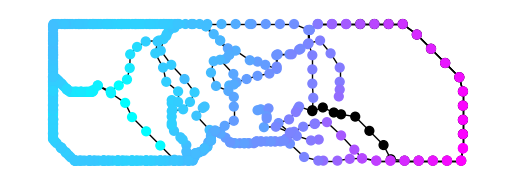

In [9]:

src = graphs[800]
dest = graphs[879]

src_node_color = src.node_color_by_position()

fig, ax = plt.subplots()

dest.draw(
  ax = ax,
  cmap = 'cool',
  node_color = dest.node_color_by_coupling(src_node_color, coupling),
  rotation = -90
)

fig.savefig('figures/heated_cylinder_pfgw_individual.0879.png', dpi=300)

In [10]:
max_match_pw = pipeline.max_match('heated_cylinder_max_match_pw').build()

max_match_pw.results.shape

> [max_match:heated_cylinder_max_match_pw] config unchanged, loading


(41, 10)

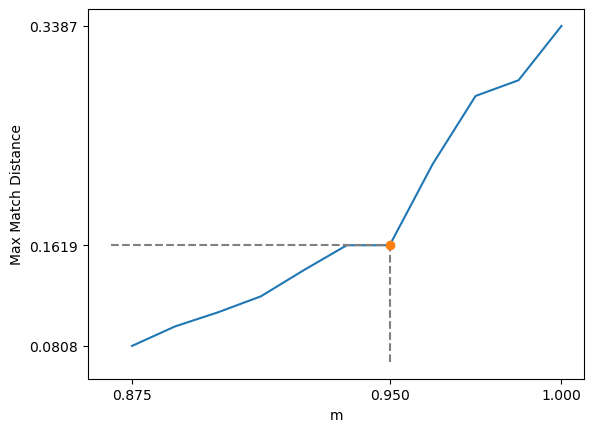

In [18]:
m = 0.95

fig, ax = plt.subplots()
  
x = max_match_pw.ms[30:]
y = max_match_pw.results[30:, 4]

ax.plot(x, y)

ymin, _ = ax.get_ybound()
xmin, _ = ax.get_xbound()

i = np.abs(x - m).argmin()

ax.add_line(Line2D([x[i], x[i]], [ymin, y[i]], color='grey', linestyle='--'))
ax.add_line(Line2D([xmin, x[i]], [y[i], y[i]], color='grey', linestyle='--'))
ax.plot(x[i], y[i], marker='o')

ax.set_xlabel('m', fontsize=10)
ax.set_ylabel('Max Match Distance', fontsize=10)

ax.set_xticks([x.min(), x[i], x.max()])
ax.set_yticks([y.min(), y[i], y.max()])

In [16]:
attributes.attrs[attributes.index_map[800], attributes.index_map[879]].sum()

120792.5610797684

In [19]:
m

0.95

m=0.95
sum(M) = 120792.5610797684


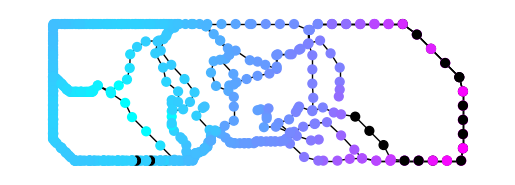

In [22]:

src_net = nets[800]
dest_net = nets[879]
M = attributes.attrs[attributes.index_map[800], attributes.index_map[879]]

print(f'm={m}')
print(f'sum(M) = {M.sum()}')

coupling, _ = ot.pWasserstein(
  src_net, 
  dest_net, 
  m = m,
  M = M,
)

src = graphs[800]
dest = graphs[879]

src_node_color = src.node_color_by_position()

fig, ax = plt.subplots()

dest.draw(
  ax = ax,
  cmap = 'cool',
  node_color = dest.node_color_by_coupling(src_node_color, coupling),
  rotation = -90
)

fig.savefig('figures/heated_cylinder_pw_individual.0879.png', dpi=300)

In [13]:
m_start = 0.75
m_end = 1
num_ms = 30
  
ms = [m_start + i * (m_end - m_start) / num_ms for i in range(num_ms)] + [m_end]

src_net = nets[800]
dest_net = nets[879]

distances = np.zeros(shape = len(ms))

for i, m in enumerate(ms):
  if np.isclose(m, 1):
    _, d = ot.GW(src_net, dest_net)
  else:
    _, d = ot.pGW(
      src_net, 
      dest_net, 
      m = m,
    )
  
  print(f'm = {m}, d = {d}')
  distances[i] = d
  


m = 0.75, d = 0.014189791875203674


KeyboardInterrupt: 

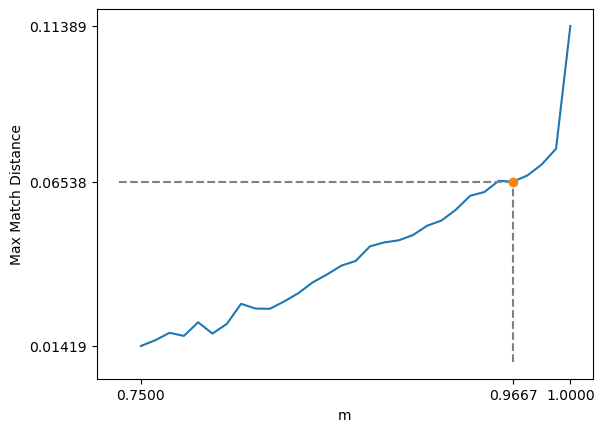

In [ ]:
m = 0.9667

fig, ax = plt.subplots()
  
x = np.asarray(ms)
y = distances

ax.plot(x, y)

ymin, _ = ax.get_ybound()
xmin, _ = ax.get_xbound()

i = np.abs(x - m).argmin()

ax.add_line(Line2D([x[i], x[i]], [ymin, y[i]], color='grey', linestyle='--'))
ax.add_line(Line2D([xmin, x[i]], [y[i], y[i]], color='grey', linestyle='--'))
ax.plot(x[i], y[i], marker='o')

ax.set_xlabel('m', fontsize=10)
ax.set_ylabel('Max Match Distance', fontsize=10)

ax.set_xticks([x.min(), x[i], x.max()])
ax.set_yticks([y.min(), y[i], y.max()])

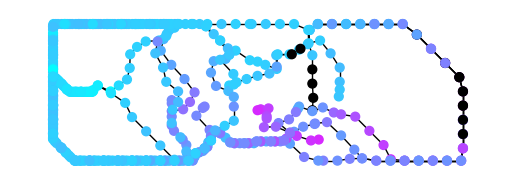

In [ ]:
src_net = nets[800]
dest_net = nets[879]

coupling, _ = ot.pGW(
  src_net, 
  dest_net, 
  m = m,
)

src = graphs[800]
dest = graphs[879]

src_node_color = src.node_color_by_position()

fig, ax = plt.subplots()

dest.draw(
  ax = ax,
  cmap = 'cool',
  node_color = dest.node_color_by_coupling(src_node_color, coupling),
  rotation = -90
)

fig.savefig('figures/heated_cylinder_pgw_individual.0879.png', dpi=300)